# Linear Regression with Tensorflow

This tutorial will show you a simple linear regression example.
We will declare some variable X, with corresponding dependent variables Y, and try to model their relationship using linear regression.

Here, first declare the packages we will be using: Tensorflow, numpy and matplotlib.pyplot. We will use numpy to create our data and generate some numbers. Matplotlib.pyplot would help us construct matlab-like plots (if you are familiar with Matlab), to plot our resulting fitted line.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Below, we will declare some of the fixed parameters we will use in our learning, and plot-drawing.

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In the following part, we will declare our dataset. We only use one dimensional features here for X, so that we can visualize it later on in a 2-dimensional plot. 

In [3]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

Now we move on to the part where we will start our learning with Tensorflow. 

We first declare some Placeholder Tensors to represt our input data. Since they are only one dimensional, we declare their type to be a float number. 

Next, we will declare the Variable Tensors. This depends on the parameters we will train in our learning method.
For our data, we will be training the following model:

\begin{equation}
    y = W*x + b
\end{equation}

This gives us two parameters which values we need to train, a weighting coefficient*W*, and a bias factor *b*. 
Since they will be declared as Variable Tensors, we need to give them an initial value to work on. Below, we use a randomizer to do that.

In [4]:
#Declare input data type
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

#Declare trainable parameters
randomizer=np.random
W=tf.Variable(randomizer.randn(), tf.float32, name="weight")
b=tf.Variable(randomizer.randn(), tf.float32, name="bias")

After declaring our data and parameters, we move on to declaring our model, and a cost function to evaluate it against. 

There are different cost function that you can use. Here, we give you two examples: the sum of squares, and the mean squared error, that you can choose from.

If y' is the predicted value of y given by our learned model, the sum of squares and mean squared error equations are given as follows:

\begin{equation}
Sum\_of\_squares = \sum_{n=1}^{N} y_n'² - y_n²
\end{equation}

\begin{equation}
MSE = \frac{Sum\_of\_squares}{2 * N}
\end{equation}

*N is the number of of data.

In [7]:
#Declare model
linear_model=tf.add(tf.multiply(W,x),b) #depending on your Tensorflow version, you might need to change tf.mul to tf.multiply

#Declare cost function
loss=tf.reduce_sum(tf.square(linear_model-y)) #sum of squares
loss_=tf.reduce_sum(tf.pow(linear_model-y,2))/(2*n_samples) #mean squared error

Next, we declare the method that we want to use to optimize our learning parameters. Here, we will use a Gradient Descent optimizer. To declare the optimizer, we need to indicate a learning rate, and associate it with the cost function.

In [8]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_)

Finally, we can move on to fitting our data into a regression model.

 Epoch: 0050 cost= 0.310483515 W= 0.519679 b= -1.14151
Epoch: 0100 cost= 0.283513367 W= 0.503616 b= -1.02595
Epoch: 0150 cost= 0.259656936 W= 0.488508 b= -0.917267
Epoch: 0200 cost= 0.238555044 W= 0.474299 b= -0.815046
Epoch: 0250 cost= 0.219889790 W= 0.460934 b= -0.718904
Epoch: 0300 cost= 0.203379929 W= 0.448365 b= -0.62848
Epoch: 0350 cost= 0.188776419 W= 0.436543 b= -0.543435
Epoch: 0400 cost= 0.175859481 W= 0.425424 b= -0.463447
Epoch: 0450 cost= 0.164434075 W= 0.414967 b= -0.388217
Epoch: 0500 cost= 0.154328331 W= 0.405131 b= -0.317462
Epoch: 0550 cost= 0.145389676 W= 0.395881 b= -0.250914
Epoch: 0600 cost= 0.137483403 W= 0.38718 b= -0.188324
Epoch: 0650 cost= 0.130490318 W= 0.378997 b= -0.129456
Epoch: 0700 cost= 0.124305055 W= 0.371301 b= -0.0740898
Epoch: 0750 cost= 0.118834212 W= 0.364063 b= -0.0220162
Epoch: 0800 cost= 0.113995403 W= 0.357255 b= 0.0269602
Epoch: 0850 cost= 0.109715641 W= 0.350852 b= 0.0730238
Epoch: 0900 cost= 0.105930336 W= 0.344829 b= 0.116348
Epoch: 0950 

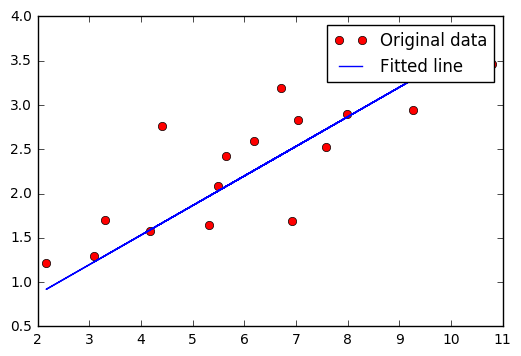

In [11]:
#Initialize variables
init = tf.global_variables_initializer()

#Perform learning
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x_, y_) in zip(train_X, train_Y):
            sess.run(optimizer, {x:x_, y:y_})

    #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(loss_, feed_dict={x: train_X, y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(loss_, feed_dict={x: train_X, y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

     #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()